# Deep Learning



In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

#MNIST

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# 28x28x1
# Normalização de dados
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Adicionar o canal
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f'Valor máximo em um pixel {np.max(x_train[0])}')
print(f'Valor mínimo em um pixel {np.min(x_train[0])}')



Valor máximo em um pixel 1.0
Valor mínimo em um pixel 0.0


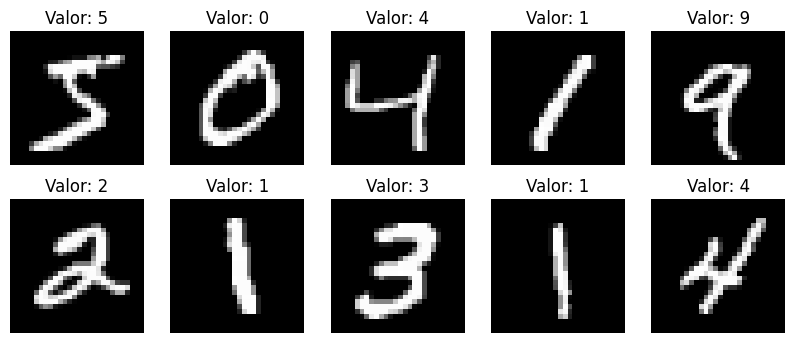

In [11]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(f'Valor: {y_train[i]}')
    plt.axis('off')
plt.show()

# CNN

In [12]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9945 - loss: 0.0157 - val_accuracy: 0.9922 - val_loss: 0.0294
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9961 - loss: 0.0113 - val_accuracy: 0.9918 - val_loss: 0.0319
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9975 - loss: 0.0072 - val_accuracy: 0.9895 - val_loss: 0.0418
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9971 - loss: 0.0080 - val_accuracy: 0.9907 - val_loss: 0.0420
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9905 - val_loss: 0.0396


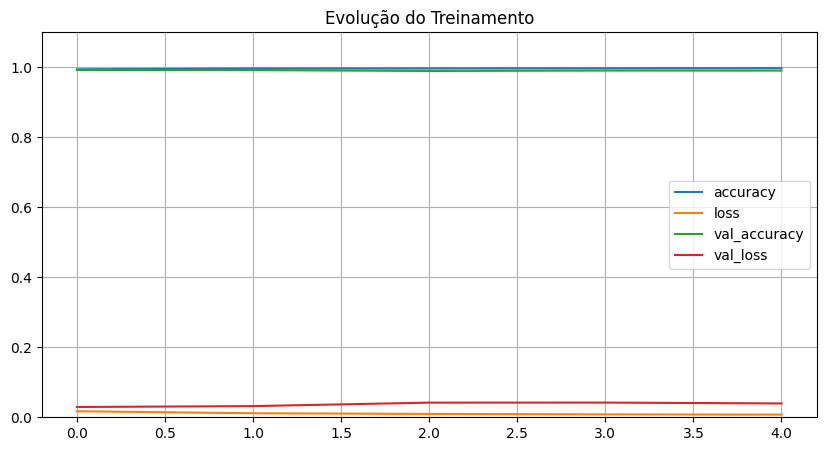

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1.1)
plt.title("Evolução do Treinamento")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


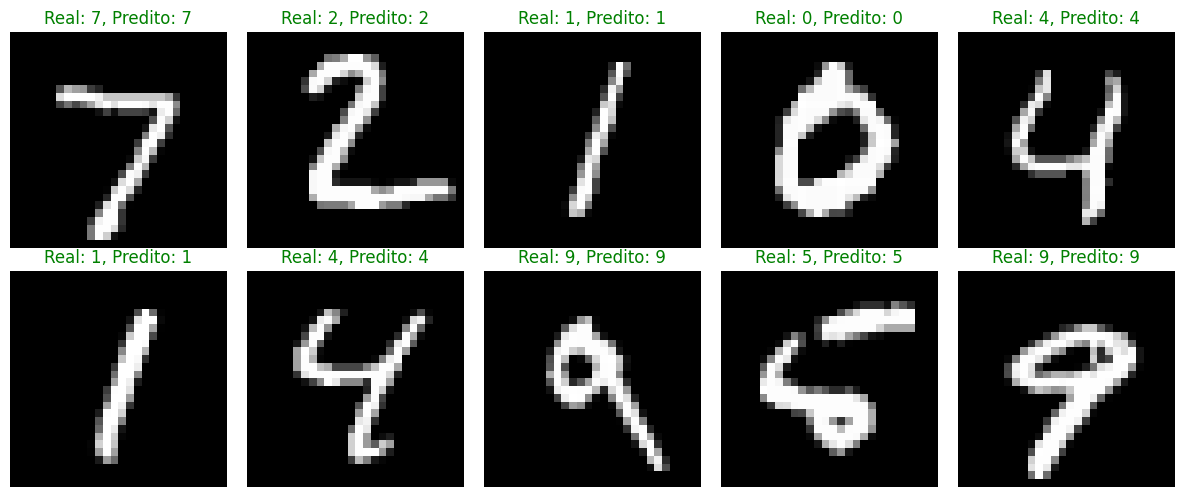

In [18]:
imagens_teste = x_test[:10]
rotulos_reais = y_test[:10]

previsoes = model.predict(imagens_teste)

plt.figure(figsize=(12,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(imagens_teste[i].reshape(28, 28), cmap="gray")

    previsao_digito = np.argmax(previsoes[i])
    real_digito = rotulos_reais[i]

    cor = 'green' if previsao_digito == real_digito else 'red'
    plt.title(f"Real: {real_digito}, Predito: {previsao_digito}", color=cor)
    plt.axis('off')

plt.tight_layout()
plt.show()